In [1]:
import empiricaldist
from statadict import parse_stata_dict

In [2]:
dict_file='GSS.dct'
data_file='GSS.dat.gz'

In [3]:
from statadict import parse_stata_dict
stata_dict = parse_stata_dict(dict_file)

In [4]:
import gzip
fp = gzip.open(data_file)

In [5]:
import pandas as pd
gss = pd.read_fwf(fp, names=stata_dict.names, colspecs=stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0  1972    1   23    16       2       1      0  18951.0
1  1972    2   70    10       1       1      0  24366.0
2  1972    3   48    12       2       1      0  24366.0
3  1972    4   27    17       2       1      0  30458.0
4  1972    5   61    12       2       1      0  50763.0


In [6]:
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [7]:
import numpy as np
educ=gss['EDUC'].replace([98,99], np.nan)

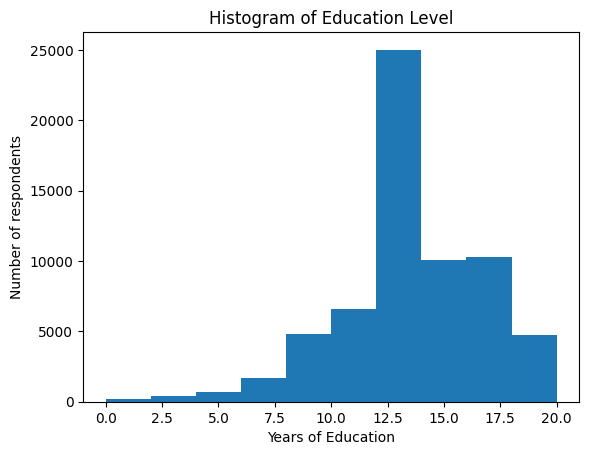

In [8]:
import matplotlib.pyplot as plt
educ.hist(grid=False)
plt.xlabel('Years of Education')
plt.ylabel('Number of respondents')
plt.title('Histogram of Education Level');
plt.show()

In [9]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ, normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: count, dtype: int64
1439


In [10]:
pmf_educ_norm = Pmf.from_seq(educ, normalize = True)
print(pmf_educ.head())
print(pmf_educ[12])

EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64
19663


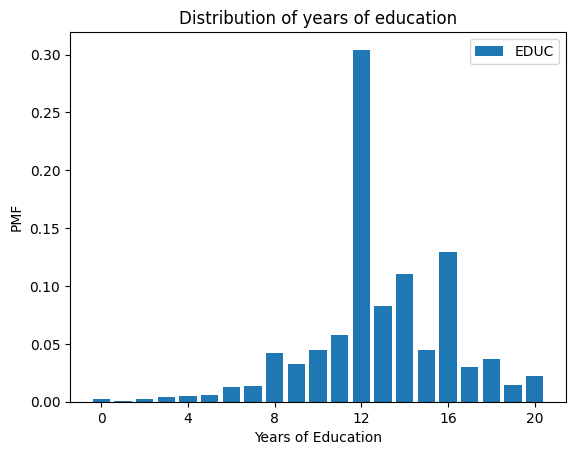

In [11]:
pmf_educ_norm.bar(label='EDUC')
plt.xlabel('Years of Education')
plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of years of education')
plt.legend();
plt.show()

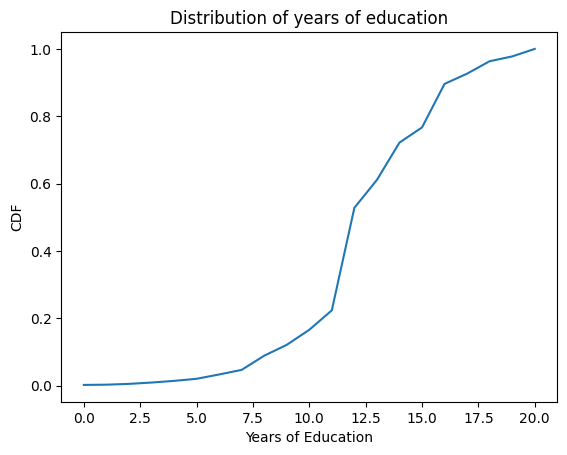

In [12]:
#CDF
from empiricaldist import Cdf
educ=gss['EDUC'].replace([98,99], np.nan)
cdf_educ=Cdf.from_seq(educ)
cdf_educ.plot()
plt.xlabel('Years of Education')
plt.ylabel('CDF')
plt.title('Distribution of years of education')
plt.show()

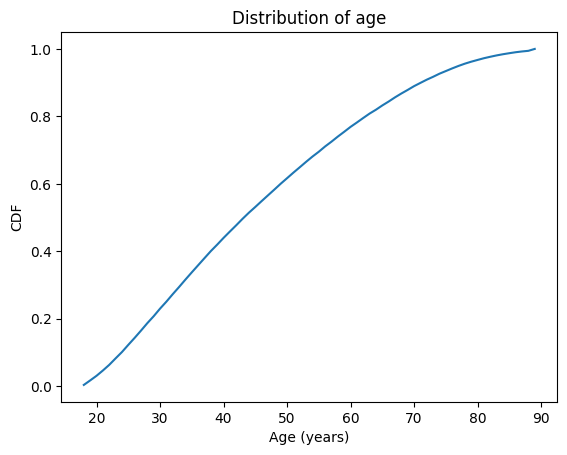

In [13]:
from empiricaldist import Cdf
age=gss['AGE'].replace([98,99], np.nan)
cdf_age=Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Distribution of age')
plt.show()

In [14]:
q=51
p =cdf_age(q)
print(p)

0.6331867587402843


In [15]:
p1=0.25
q1=cdf_age.inverse(p1)
print(q1)

31.0


In [16]:
p3 = 0.75
q3 = cdf_age.inverse(p3)
print(q3-q1)

28.0


In [17]:
print(f"Q1: {q1} , Q3: {q3}")

Q1: 31.0 , Q3: 59.0


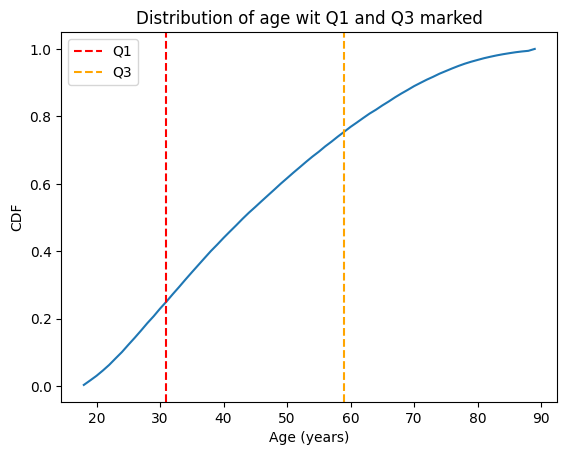

In [18]:
cdf_age = empiricaldist.Cdf.from_seq(age)
cdf_values = cdf_age.values
data_points = cdf_age.index
plt.plot(data_points,cdf_values)
plt.axvline(x=q1, color ='red',linestyle = '--', label = 'Q1')
plt.axvline(x=q3, color ='orange',linestyle = '--', label = 'Q3')
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Distribution of age wit Q1 and Q3 marked')
plt.legend();
plt.show()

In [19]:
age_data = gss['AGE']

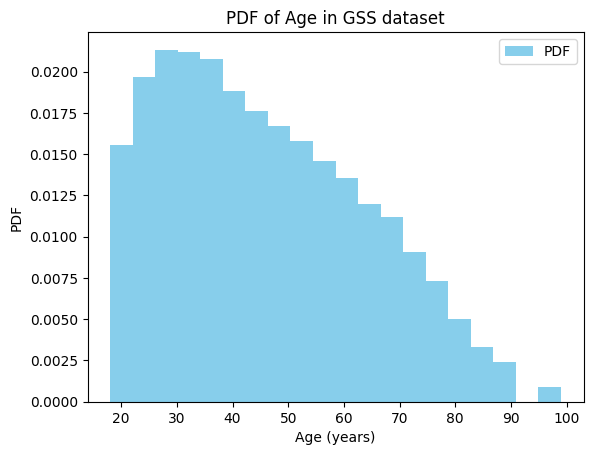

In [20]:
plt.hist(age_data,bins=20,density=True,color='skyblue',label='PDF')
plt.xlabel('Age (years)')
plt.ylabel('PDF')
plt.title('PDF of Age in GSS dataset')
plt.legend();
plt.show()

In [21]:
pmf = age_data.value_counts(normalize=True).sort_index()

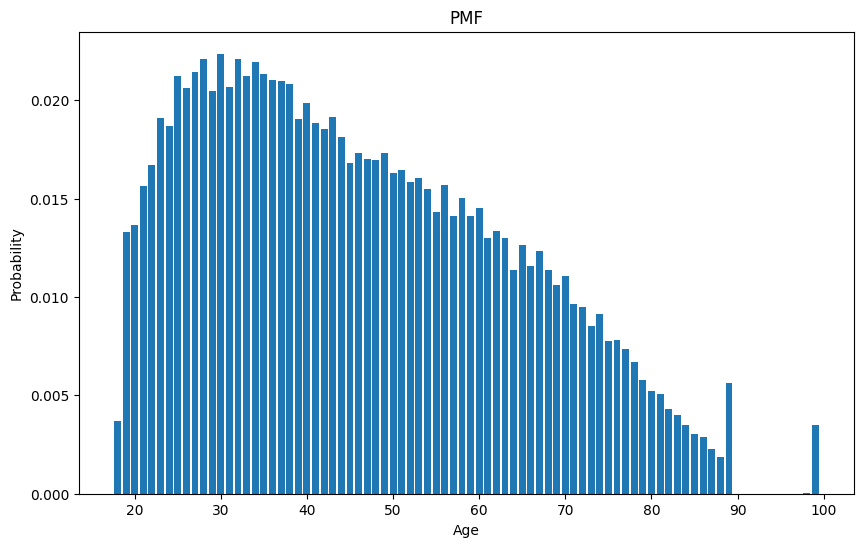

In [22]:
plt.figure(figsize=(10,6))
plt.bar(pmf.index,pmf.values)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('PMF');
plt.show()